In [1]:
import numpy as np
import matplotlib.pyplot as plt
import apogee.tools.read as apread
import apogee.spec.plot as splot
from tqdm import tqdm
try:
    from sewingmachine import equivalentwidths, linelist

except NameError:
    reload(equivalentwidths)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Re-fitting continuum after sigma clipping...


(0.15623079470219248, 0.019354601913129797)

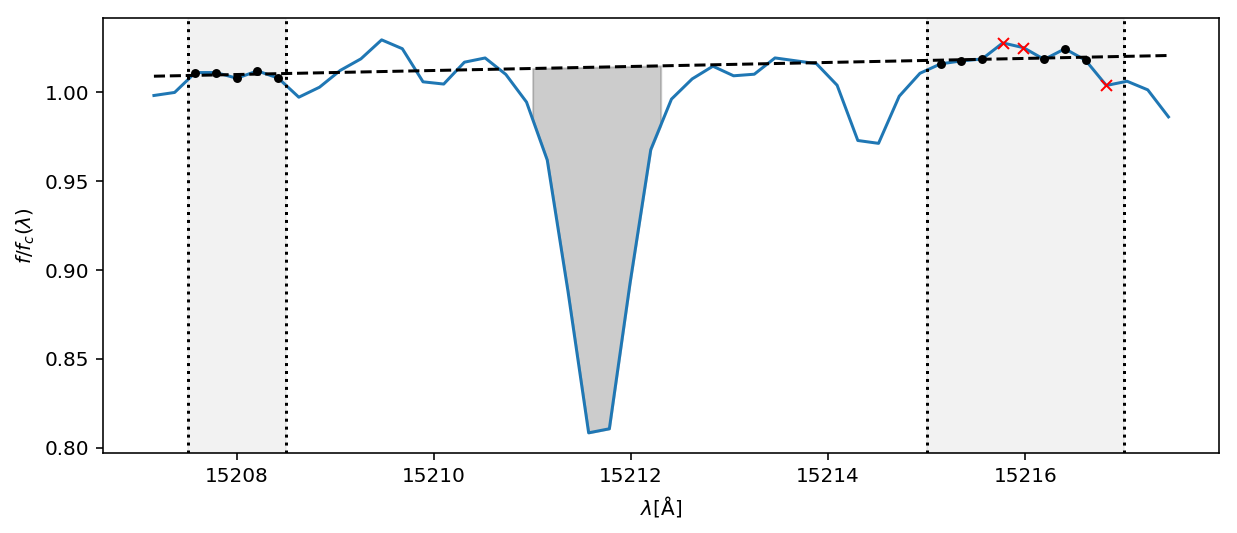

In [2]:
lams= splot.apStarWavegrid()
inds = (lams > 15206) & (lams < 15218)
spec, hdr = apread.aspcapStar(4120, '2M00221738+6957505', ext=1)
errspec, hdr = apread.aspcapStar(4120, '2M00221738+6957505', ext=2)
spectrum = np.dstack([lams,spec,errspec])[0]

fig = plt.figure()
fig.set_size_inches(10,4)
integration = [15211, 15212.3]
windows = [[15207.5,15208.5], [15215,15217]]

equivalentwidths.trapz_ew(spectrum, integration, windows, plot=True, sigma=1., verbose=True, error=True)

In [3]:
%timeit -n 100 equivalentwidths.trapz_ew(spectrum, integration, windows, plot=False, sigma=1, error=True)

100 loops, best of 3: 2.42 ms per loop


In [4]:
lines = linelist.Linelist('linelists/linelist.txt')

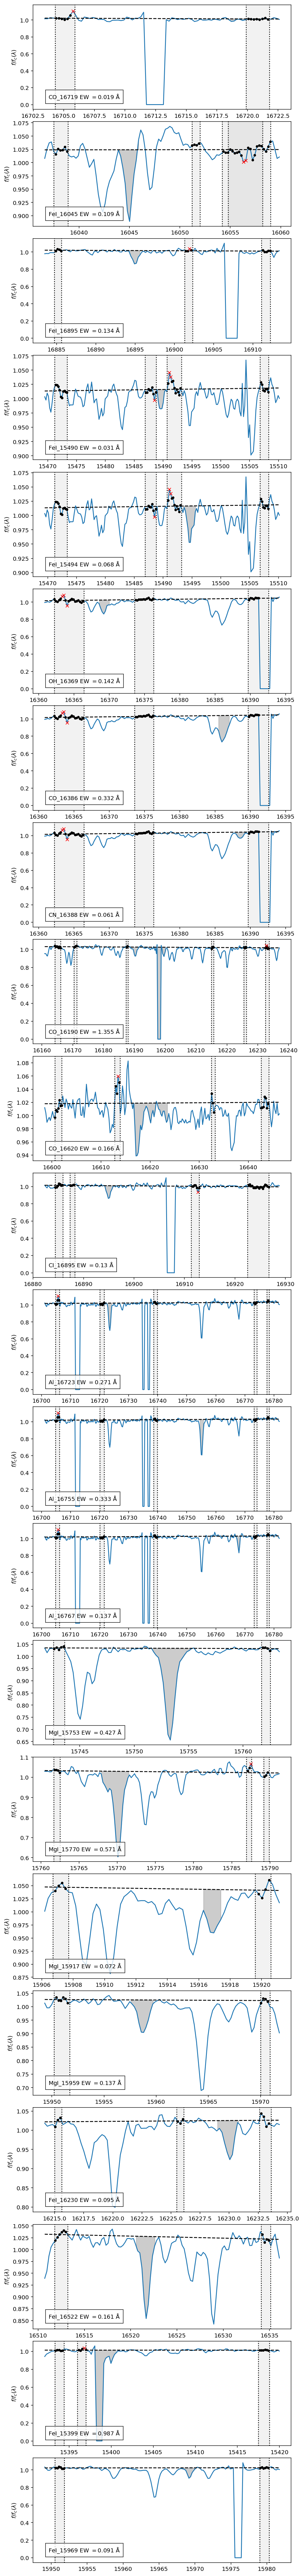

In [5]:
ews, errs, flags = equivalentwidths.measurelinelist(spectrum, lines, sigma = 2, plot=True, return_flags=True, error=True)

In [6]:
print ews
print errs
print flags

[ 0.01874904  0.10850065  0.13411256  0.03063063  0.06752875  0.14188378
  0.33206328  0.06071425  1.35481682  0.16555933  0.12952434  0.27095986
  0.33291334  0.13651847  0.42701866  0.57111331  0.07170446  0.1369376
  0.09464603  0.16105109  0.98677788  0.09102054]
[  2.60777462e-02   2.09607779e-02   3.98450875e-02   1.75392451e-02
   2.13436564e-02   4.45861630e-02   4.89153319e-02   4.96147512e-02
   1.04332730e+02   1.55430998e+01   4.37705000e-02   2.66616658e-02
   2.50712660e-02   2.37265091e+01   2.96139407e-02   2.86756314e-02
   1.58804140e-02   1.96705751e-02   1.95085223e-02   2.51488850e-02
   1.58540593e+02   1.68767808e-02]
[[], [], [], [], [], ['CONTINUUM_BAD_PIXEL'], ['CONTINUUM_BAD_PIXEL'], ['CONTINUUM_BAD_PIXEL'], ['INTEGRATION_BAD_PIXEL'], [], [], [], [], [], [], [], [], [], [], [], ['INTEGRATION_BAD_PIXEL'], []]


Re-fitting continuum after sigma clipping...


(1.3685014180958408, 104.33273042910648, ['INTEGRATION_BAD_PIXEL'])

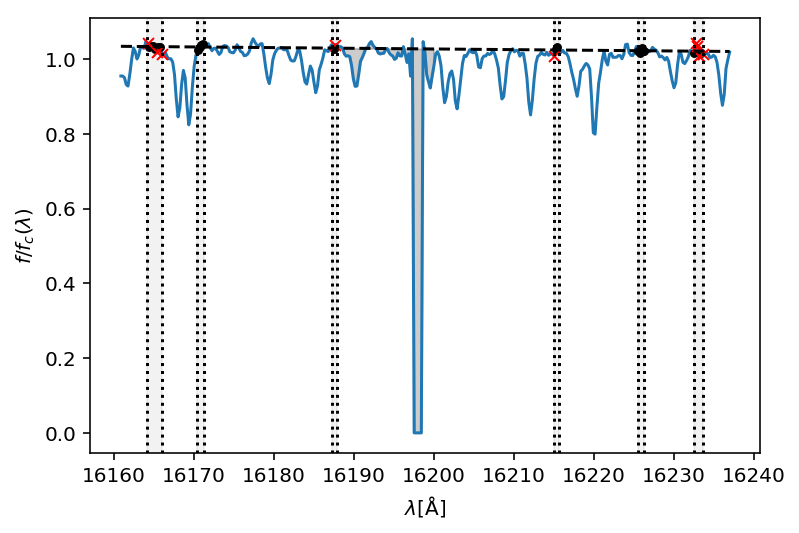

In [7]:
equivalentwidths.trapz_ew(spectrum, lines.integration[8], lines.windows[8], plot=True, sigma=1, verbose=True, return_flags = True, error=True)

In [8]:
allStar = apread.allStar()

In [9]:
specs = np.empty([100,len(lams)])
errspecs = np.empty([100,len(lams)])
for i in tqdm(range(100)):
    specs[i], hdr = apread.aspcapStar(allStar['LOCATION_ID'][i], allStar['APOGEE_ID'][i], ext=1)
    errspecs[i], hdr = apread.aspcapStar(allStar['LOCATION_ID'][i], allStar['APOGEE_ID'][i], ext=2)
    

100%|██████████| 100/100 [00:00<00:00, 119.51it/s]


In [10]:
%%timeit
ews = np.empty([100,len(lines.labels)])
errs = np.empty([100,len(lines.labels)])
flags = []
for i in tqdm(range(100)):
    spectrum = np.dstack([lams, specs[i], errspecs[i]])[0]
    ews[i], errs[i], flagsi = equivalentwidths.measurelinelist(spectrum, lines, sigma = 2, return_flags=True, error=True)
    flags.append(flagsi)

100%|██████████| 100/100 [00:05<00:00, 16.89it/s]

1 loop, best of 3: 4.45 s per loop


In [12]:
try:
    reload(measure_apogee)
except NameError:
    import measure_apogee

allStarmask = (allStar['GLON'] > 0.) & (allStar['GLON'] < 45.) & (allStar['GLAT'] > 20) & (allStar['VHELIO_AVG'] < 150) & (allStar['VHELIO_AVG'] > -90) & (allStar['EXTRATARG'] == 0)
test_allstar = allStar[allStarmask]

ews, errs = measure_apogee.measure_apogee(test_allstar, 'linelists/linelist.txt')




  3%|▎         | 165/5800 [00:09<06:40, 14.07it/s]

  6%|▌         | 348/5800 [00:20<05:32, 16.42it/s]


 12%|█▏        | 686/5800 [00:41<05:17, 16.13it/s]


 16%|█▋        | 947/5800 [00:58<05:23, 15.01it/s]


 16%|█▋        | 949/5800 [01:02<58:52,  1.37it/s]

Spectrum missing from SAS?



 22%|██▏       | 1275/5800 [01:23<05:14, 14.41it/s]


 27%|██▋       | 1585/5800 [01:45<04:46, 14.69it/s]


 28%|██▊       | 1617/5800 [01:47<04:22, 15.92it/s]


 28%|██▊       | 1622/5800 [01:53<32:09,  2.17it/s]

Spectrum missing from SAS?



 34%|███▎      | 1954/5800 [02:14<03:56, 16.28it/s]


 39%|███▉      | 2270/5800 [02:35<04:07, 14.25it/s]


 45%|████▍     | 2595/5800 [02:56<04:21, 12.25it/s]


 49%|████▉     | 2833/5800 [03:13<03:29, 14.19it/s]


 49%|████▉     | 2837/5800 [03:28<1:22:07,  1.66s/it]

Spectrum missing from SAS?



 54%|█████▍    | 3159/5800 [03:49<02:51, 15.42it/s]


 60%|█████▉    | 3464/5800 [04:09<02:40, 14.53it/s]


 60%|█████▉    | 3468/5800 [04:18<37:05,  1.05it/s]

Spectrum missing from SAS?



 63%|██████▎   | 3659/5800 [04:30<02:40, 13.32it/s]


 63%|██████▎   | 3663/5800 [04:34<13:46,  2.58it/s]

Spectrum missing from SAS?



 69%|██████▊   | 3980/5800 [04:54<02:04, 14.60it/s]


 74%|███████▍  | 4297/5800 [05:16<01:35, 15.68it/s]


 75%|███████▍  | 4341/5800 [05:18<01:22, 17.67it/s]


 75%|███████▍  | 4345/5800 [05:22<10:59,  2.21it/s]

Spectrum missing from SAS?



 80%|████████  | 4661/5800 [05:43<01:14, 15.33it/s]


 86%|████████▌ | 4971/5800 [06:04<00:54, 15.16it/s]


 91%|█████████ | 5282/5800 [06:25<00:28, 18.47it/s]


 97%|█████████▋| 5605/5800 [06:45<00:13, 14.45it/s]


100%|██████████| 5800/5800 [06:56<00:00, 13.93it/s]

In [13]:
lines.labels

array(['CO_16719', 'FeI_16045', 'FeI_16895', 'FeI_15490', 'FeI_15494',
       'OH_16369', 'CO_16386', 'CN_16388', 'CO_16190', 'CO_16620',
       'CI_16895', 'Al_16723', 'Al_16755', 'Al_16767', 'MgI_15753',
       'MgI_15770', 'MgI_15917', 'MgI_15959', 'FeI_16230', 'FeI_16522',
       'FeI_15399', 'FeI_15969'],
      dtype='|S9')

(-0.1, 1.0)

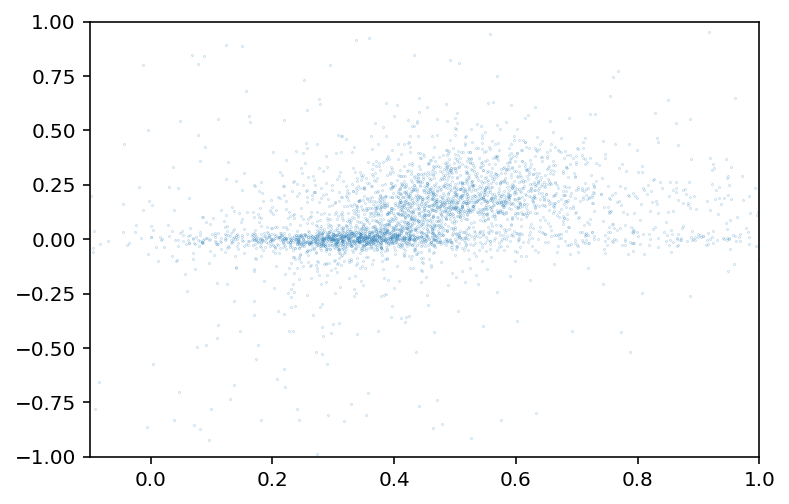

In [22]:
plt.scatter(ews[:,7]/ews[:,1], test_allstar['N_FE'], s=0.01)
plt.ylim(-1.,1.)
plt.xlim(-0.1,1.)

In [38]:
(133 & 7) != 0 

True

In [77]:
int('100000000000000100000001000001', 2)

536887361

In [69]:
np.bitwise_and(1033, 0)

0

In [83]:
bin(0)

'0b0'